#### Preliminary prep - Importing and Organizing Data

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Fetching the data from Yahoo Finance
ticker = {'BCA' : 'BBCA.JK', 'IHSG' : '^JKSE', 'BTN' : 'BBTN.JK', 'MANDIRI' : 'BMRI.JK', 'BNI' : 'BBNI.JK', 'BRI': 'BBRI.JK'}
data = pd.DataFrame()

for t in ticker:
    data[t] = yf.download(ticker[t], start='2010-12-31', auto_adjust=False)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:
# Checking data completeness - starting date
data.head()

,BCA,IHSG,BTN,MANDIRI,BNI,BRI
Date,,,,,,
2011-01-03,1005.559509,3727.372070,1012.174438,891.321899,1221.219360,552.083252
2011-01-04,1013.354797,3759.914795,1030.357422,912.050293,1229.253784,549.416260
2011-01-05,1028.944580,3783.561768,1066.722900,946.597717,1245.322632,565.418518
2011-01-06,1021.149597,3736.111816,1042.479248,925.869263,1205.150635,552.083252
2011-01-07,997.764343,3631.311768,969.748047,884.412598,1140.876343,522.745483


In [3]:
# Checking data completeness - ending date
data.tail()

,BCA,IHSG,BTN,MANDIRI,BNI,BRI
Date,,,,,,
2025-05-08,8975.0,6827.750000,1160.0,4790.0,4120.0,3790.0
2025-05-09,9000.0,6832.803223,1150.0,4770.0,4100.0,3840.0
2025-05-14,9275.0,6979.879883,1220.0,5050.0,4370.0,4090.0
2025-05-15,9275.0,7040.161133,1240.0,5325.0,4500.0,4270.0
2025-05-16,9300.0,7106.525879,1250.0,5475.0,4500.0,4250.0


In [4]:
# Checking data completeness
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3539 entries, 2011-01-03 to 2025-05-16
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BCA      3539 non-null   float64
 1   IHSG     3487 non-null   float64
 2   BTN      3539 non-null   float64
 3   MANDIRI  3539 non-null   float64
 4   BNI      3539 non-null   float64
 5   BRI      3539 non-null   float64
dtypes: float64(6)
memory usage: 193.5 KB


It looks like there are some missing rows for the market index (IHSG / ticker:^JKSE) data. A check on which rows are missing is needed. The code is run below:

In [13]:
# Checking the missing data
missing_rows = data[data.isnull().any(axis=1)]
missing_rows

,BCA,IHSG,BTN,MANDIRI,BNI,BRI
Date,,,,,,
2014-04-09,1778.717896,NaN,928.337402,1554.138672,1765.645508,1146.984863
2014-07-09,1848.173096,NaN,778.829834,1538.976440,1742.017578,1293.591187
2015-12-09,2161.696045,NaN,905.321777,1388.898071,1783.576660,1290.749268
2017-01-02,2606.082031,NaN,1256.822754,1833.268066,2018.848511,1421.294434
2017-02-15,2606.082031,NaN,1466.292969,1809.510986,2302.035400,1460.859253
2017-04-19,2867.156982,NaN,1690.125977,1903.947998,2394.144531,1619.981079
2017-06-01,2905.272217,NaN,1845.115601,2041.680542,2469.550781,1821.298828
2017-06-23,3074.676270,NaN,1918.920166,2065.986328,2488.402832,1918.812500
2017-06-26,3074.676270,NaN,1918.920166,2065.986328,2488.402832,1918.812500


Further inspection revealed that missing rows from the market index were due to public holidays or when the market is closed domestically. Individual stock prices might still show due to their stock-specific trading value.
However, some technical issues attributed to the Indonesian's stock market index value calculation is still possible.

A data interpolation could be used to fill in the gaps, employing a rather straightforward statistical guesstimate of the values to gain a better dataset.

#### Stock price(s) trend analysis

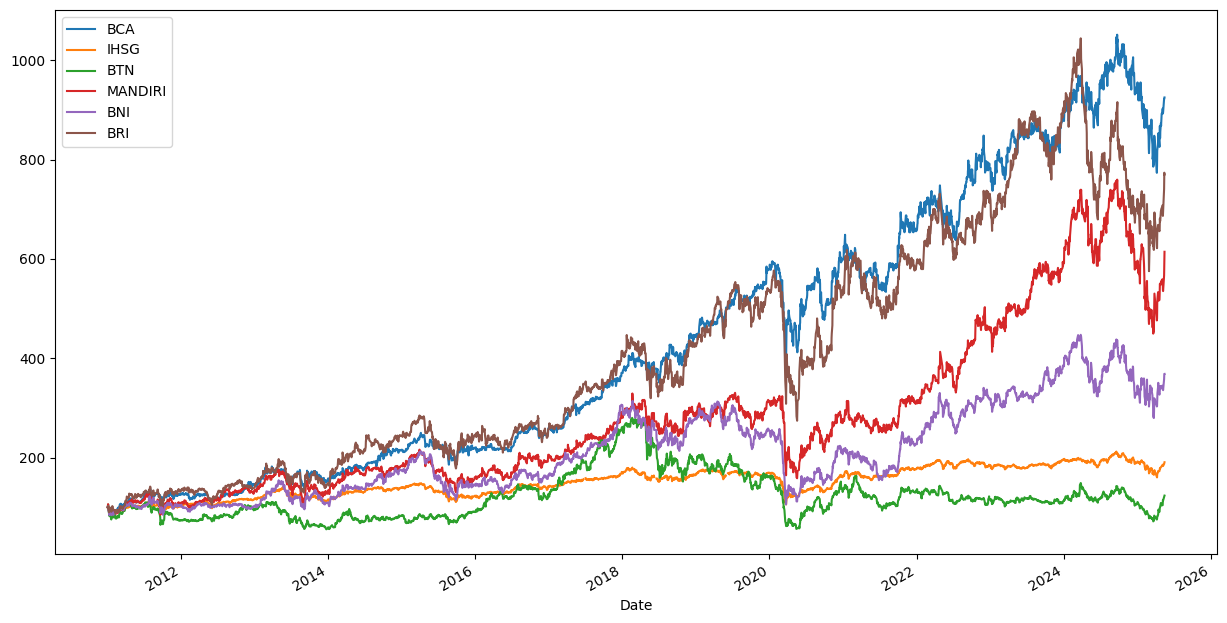

In [6]:
# Normalized comparation BBCA against IHSG
normalized_data = (data / data.iloc[0]) * 100

normalized_data.plot(figsize = (15, 8))
plt.show()

**Descriptively: A clear and obvious decline of the whole market occurred during the Covid-19 pandemic inception, followed by a steady increase of stock price of several but NOT ALL observed Banks.**

1. Bank Central Asia (BCA) led the roster, experiencing the least decline during the pandemic and outperforming other observed Banks.
2. Bank Rakyat Indonesia (BRI) and Bank Mandiri (MANDIRI) followed with BRI performing in closely mirroring those of BCA.
3. Bank Negara Indonesia (BNI) rebounded from its decline during the pandemic, though did not perform as well as the top three banks: BCA, BRI, and MANDIRI. Signaling a stagnation of perceived stock price, albeit the economy's improment.
4. Bank Tabungan Negara (BTN) practically failed in its perceived price within the stock market, failing to bounce back to their pre-pandemic value.
5. Indonesia Stock Market Index (IHSG) experienced a stagnant (sideways) growth after the pandemic. Though their nominal value did reflect a steady improvement

----

**Recent major changes**: Newly elected President brought an obvious negative sentiment within the stock market.
- All observed Banks experienced a **significant** decline in perceived stock price, especially state-owned banks.
- BCA experienced a **significant** decline, albeit still outperformed the other observed banks that are owned by the State.

This negative sentiment came from the current governmental political and invesment decision:
- Budget efficiency measures within the government impacting government officials restricting their day-to-day work necessities: limited office hour, limited use of electrical equipment, etc.
- A cut in higher-educational sector reflected in decreased budget allocated to state-owned universities, reflected poorly to the current administration's priority with education.
- An establishment of new Sovereign Wealth Fund called *The Agency for Investment Management Daya Anagata Nusantara* (Danantara) without much credibility, amidst multiple corruption cases and nepotism allegation to the current and previous adminisitration's family and close circle. This raised the question whether the current admninistration will handle Danantara with the required *Competence* and *Integrity*

#### Stock price data extrapolation

In [7]:
# Calculating the log returns for the observed data set
log_returns = np.log(1+ data.pct_change())
log_returns.tail()

<ipython-input-7-02001d1534c4>:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  log_returns = np.log(1+ data.pct_change())


,BCA,IHSG,BTN,MANDIRI,BNI,BRI
Date,,,,,,
2025-05-08,-0.011080,-0.014320,0.094879,-0.032857,-0.009662,-0.031171
2025-05-09,0.002782,0.000740,-0.008658,-0.004184,-0.004866,0.013106
2025-05-14,0.030098,0.021297,0.059089,0.057042,0.063776,0.063073
2025-05-15,0.000000,0.008599,0.016261,0.053024,0.029314,0.043069
2025-05-16,0.002692,0.009382,0.008032,0.027780,0.000000,-0.004695


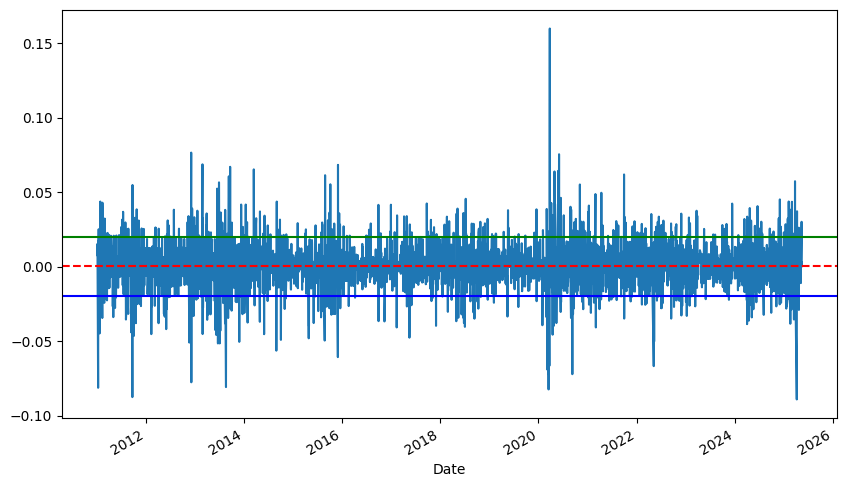

In [8]:
# Plotting the stock price to see the distribution of mean
log_returns['BCA'].plot(figsize = (10, 6))

# Add a horizontal line at a specific y-value (e.g., mean)
plt.axhline(y=log_returns['BCA'].mean(), color='r', linestyle='--', label='Mean')
# Add additional horizontal lines if needed (e.g., specific thresholds)
plt.axhline(y=0.02, color='g', linestyle='-', label='Threshold 1')
plt.axhline(y=-0.02, color='b', linestyle='-', label='Threshold 2')

plt.show()

An obvious volatility occurred during the Pandemic. A somewhat more stable period followed after, with less high volatilies occurring like those in the 2010-2012, 2013, and 2015